In [0]:
# Importing packages and dependencies
import numpy as np
from PIL import Image
from keras.utils import np_utils
from keras.datasets import cifar10
from matplotlib import pyplot as plt

# Importing model layers, model type and optimizers
from keras.models import Sequential
from keras.layers import Dropout, Activation, Conv2D, GlobalAveragePooling2D,MaxPooling2D,BatchNormalization
from keras.optimizers import Adam,SGD

Using TensorFlow backend.


In [0]:
# Loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [0]:
# Lets determine the dataset characteristics
print('Training set : ' + str(X_train.shape))
print('Testing set : ' + str(y_train.shape))
print('Feature set dimensions : ' + str(X_train[0].shape))
print('Class label type : ' + str(type(y_train[0])))

Training set : (50000, 32, 32, 3)
Testing set : (50000, 1)
Feature set dimensions : (32, 32, 3)
Class label type : <class 'numpy.ndarray'>


In [0]:
# Making a dictionary of class labels with class names
class_labels = range(0,10)

classes = ['airplane',
        'automobile',
        'bird',
        'cat',
        'deer',
        'dog',
        'frog',
        'horse',
        'ship',
        'truck']

class_labels = dict(zip(class_labels, classes))

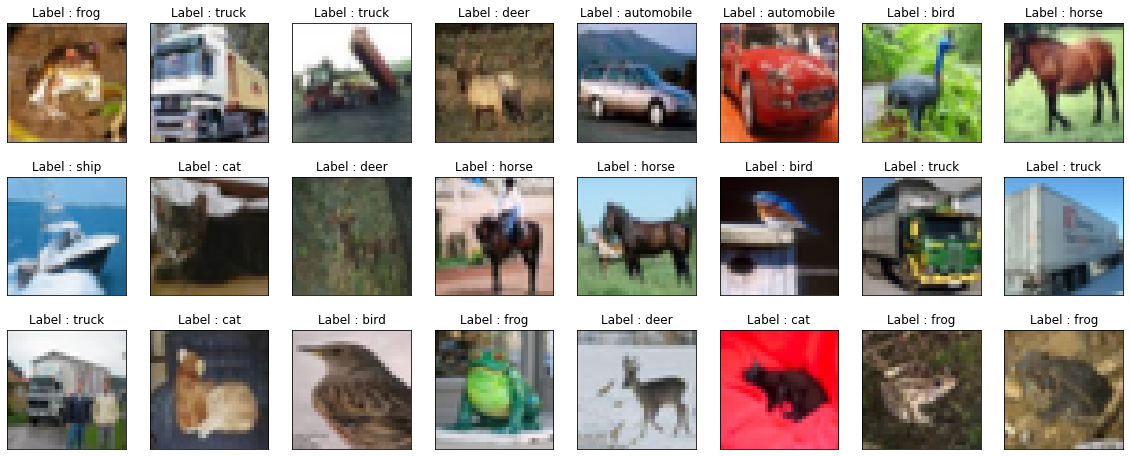

In [0]:
# Printing a sample of images
fig, axs = plt.subplots(3, 8, figsize = (20, 8))
axs = axs.flatten()

for i in range(0,24):
  for key, value in class_labels.items():
    if y_train[i] == key:
      
      title = 'Label : {}'.format(class_labels[key])
      axs[i].set_title(title)
      axs[i].axes.get_xaxis().set_visible(False)
      axs[i].axes.get_yaxis().set_visible(False)      
    
    img = X_train[i]
    axs[i].imshow(img)
    
plt.show()

In [0]:
# Random seed for reproducibility
seed = 1
np.random.seed(seed) 

# Normalizing the pixel values to 0 to 1 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0


In [0]:
# Encoding the labels to one hot vector
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
num_classes = Y_test.shape[1]

In [0]:
# Defining a function to build the model
def model_custom(weights=None):
    
    # Defining model layout and adding layers
    
    model = Sequential()
    
    model.add(Conv2D(96, (3, 3), padding = 'same', input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    
    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='valid'))    

    model.add(Conv2D(384, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))            
    
    model.add(Conv2D(384, (3, 3), padding = 'same'))
    model.add(Activation('relu'))        
    model.add(Dropout(0.5))    
    
    model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='valid'))    

    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))    
    
    model.add(Conv2D(196, (1, 1), padding = 'valid'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(10, (1, 1), padding = 'valid'))
    
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))
    
    # Loading model weights if provided
    if weights:
        model.load_weights(weights)
    
    return model


In [0]:
# Defining the hyper parameters of the model
learning_rate = 0.0001
weight_decay = 1e-6
momentum = 0.9
epochs = 500
batch_size = 128

# Augmenting the input data 
import keras
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator( rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
                              width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
                              height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
                              horizontal_flip=True ) # randomly flip images

# Build the model compile and print model summary
model = model_custom()
opt = Adam(lr=learning_rate, decay=weight_decay)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model.summary())

datagen.fit(X_train)

# Fitting the model on the batches generated by datagen.flow().
model.fit_generator(datagen.flow(X_train,Y_train,
                                 batch_size=batch_size),
                                 epochs=epochs,
                                 steps_per_epoch=X_train.shape[0] // batch_size,
                                 validation_data=(X_test, Y_test))

W0620 23:30:38.224242 140262060369792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0620 23:30:38.239887 140262060369792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0620 23:30:38.244109 140262060369792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0620 23:30:38.284348 140262060369792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0620 23:30:38.298826 140262060369792 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 192)       166080    
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 192)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 192)       331968    
_________________________________________________________________
activation_3 (Activation)    (None, 32, 32, 192)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 192)       0         
__________

W0620 23:30:38.711227 140262060369792 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/500
390/390 [==============================] - 56s 145ms/step - loss: 2.1957 - acc: 0.1660 - val_loss: 2.1228 - val_acc: 0.2113
Epoch 2/500
390/390 [==============================] - 53s 135ms/step - loss: 2.0337 - acc: 0.2367 - val_loss: 2.1054 - val_acc: 0.2385
Epoch 3/500
390/390 [==============================] - 51s 130ms/step - loss: 1.9894 - acc: 0.2626 - val_loss: 1.9929 - val_acc: 0.2979
Epoch 4/500
390/390 [==============================] - 51s 130ms/step - loss: 1.9378 - acc: 0.2868 - val_loss: 1.9465 - val_acc: 0.3103
Epoch 5/500
390/390 [==============================] - 51s 130ms/step - loss: 1.8836 - acc: 0.3090 - val_loss: 1.8903 - val_acc: 0.3411
Epoch 6/500
390/390 [==============================] - 51s 130ms/step - loss: 1.8411 - acc: 0.3238 - val_loss: 1.8213 - val_acc: 0.3837
Epoch 7/500
390/390 [==============================] - 51s 130ms/step - loss: 1.7890 - acc: 0.3457 - val_loss: 1.8210 - val_acc: 0.3951
Epoch 8/500
390/390 [===========================

In [0]:
# Ignore this unless you use google colab
#from keras.models import load_model
#from google.colab import files
#model.save('OB_model.hdf5') # To save the model 
#files.download("OB_model.hdf5") # To download the model
#files.upload() # To upload a pretrained model
#model = load_model('OB_model1.h5') # To load a pretrained model

# test the model with pretrained weights
Pred = model.evaluate(X_test, Y_test, verbose=1)
print("Accuracy : " + str(Pred[1]*100) + "%")
print("Cost : " + str(Pred[0]))

In [0]:
# Printing the sample predictions
fig, axs = plt.subplots(3, 8, figsize = (20, 10))
axs = axs.flatten()

for i, img in enumerate(test):

    # Finding the label for each prediction and printing
    for key, value in class_labels.items():
        if Pred[i] == key:
            title = 'Prediction : {}\nOriginal : {}'.format(class_labels[key],class_labels[label[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    axs[i].imshow(img)
    
plt.show()

In [0]:
# Creating a batch for testing the model
test = X_test[500:524]
label = np.argmax(Y_test[500:524],axis=1)

# Making predictions from the model and converting to class labels
Pred = model.predict(test , verbose = 1)
Pred = np.argmax(Pred,axis=1)